In [10]:
import numpy

file = open('data/14.txt', 'r')
data = file.read()

file.close()

In [11]:
field: None
parsed = numpy.zeros((1000, 1000), dtype=numpy.int8)
void = 0

for line in data.splitlines():
    pairs = [list(map(int, p.split(','))) for p in line.split(' -> ')]

    for index in range(len(pairs) - 1):
        p1, p2 = pairs[index:index + 2]
        x1, x2 = min(p1[0], p2[0]), max(p1[0], p2[0])
        y1, y2 = min(p1[1], p2[1]), max(p1[1], p2[1])

        if y2 > void:
            void = y2

        if p1[0] == p2[0]:
            for coord in [(p1[0], p) for p in range(y1, y2 + 1)]:
                parsed[coord] = 1

        if p1[1] == p2[1]:
            for coord in [(p, p1[1]) for p in range(x1, x2 + 1)]:
                parsed[coord] = 1

In [12]:
def down(x, y):
    return x, y + 1

def left(x, y):
    return x - 1, y + 1

def right(x, y):
    return x + 1, y + 1

def on_floor(s):
    return s[1] == void + 2

In [13]:
def find_next_cell(start):
    piece = down(*start)
    if not field[piece] and not on_floor(piece):
        return True, piece

    piece = left(*start)
    if not field[piece] and not on_floor(piece):
        return True, piece

    piece = right(*start)
    if not field[piece] and not on_floor(piece):
        return True, piece

    return False, start

In [14]:
from matplotlib import pyplot

def draw_field(field):
    # Find non-zero corners
    indices = numpy.argwhere(field)
    tl = indices.min(axis=0)
    br = indices.max(axis=0)

    # Crop
    field = field[tl[0]:br[0] + 1, tl[1]:br[1] + 1]

    # Rotate
    field = numpy.rot90(numpy.rot90(numpy.rot90(field)))

    # Plot
    pyplot.rcParams['figure.dpi'] = 150
    pyplot.axis('off')
    pyplot.imshow(field)
    pyplot.show()

# Star 1

In [15]:
field = parsed.copy()
sand_count = 0

def drop():
    cell = (500, 0)
    found = True

    while found:
        if cell[1] > void:
            return False

        found, cell = find_next_cell(cell)

    field[cell] = 2
    return True

while drop():
    sand_count += 1

sand_count


625

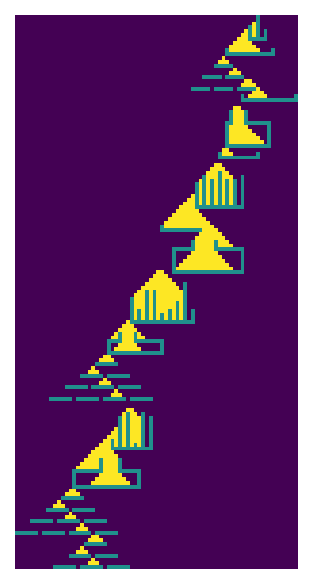

In [16]:
draw_field(field)

# Star 2

In [17]:
field = parsed.copy()
end = (500, 0)
sand_count = 0

def drop():
    cell = (500, 0)
    found = True

    while found:
        found, cell = find_next_cell(cell)

    if field[end]:
        return False

    field[cell] = 2
    return True

while drop():
    sand_count += 1

sand_count


25193

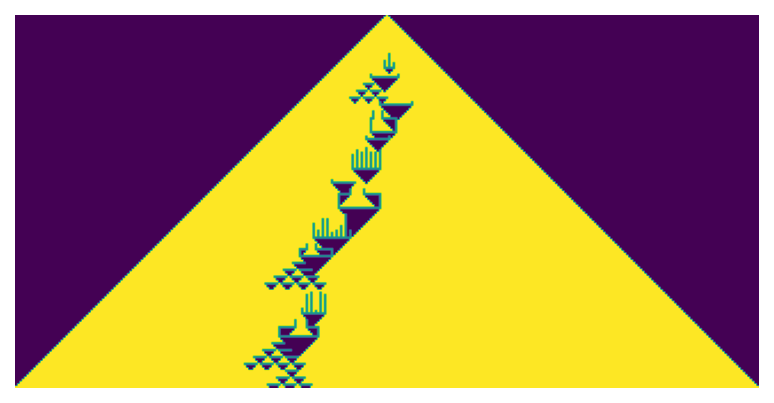

In [18]:
draw_field(field)